### Email Project
Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


- 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
- 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
- 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
- 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
- 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
- 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
- 7. Which lessons are least accessed?
- 8. Anything else I should be aware of?


Thank you,

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import acquire as a
import env

## Acquire

In [2]:
# Read csv file into pandas DataFrame

#url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
#query = 'SELECT * FROM logs JOIN cohorts on logs.cohort_id = cohorts.id'
#df = pd.read_sql('SELECT * FROM logs JOIN cohorts on logs.cohort_id = cohorts.id', url)
#df = pd.read_sql(query, url)

df = a.get_log_data()

In [3]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847330 entries, 0 to 847329
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        847330 non-null  object 
 1   time        847330 non-null  object 
 2   path        847329 non-null  object 
 3   user_id     847330 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          847330 non-null  object 
 6   id          847330 non-null  int64  
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 97.0+ MB


### Takeaways from Aquire:
- date is not in date format
- may need to change Dtype for other columns
- only one null, will leave it
- deleted_at column is all null, will delete the column

*****************************

## Prepare/Look at the data

In [5]:
# there is a date and time columns, will add them together
df['date'] = df.date + ' ' + df.time

In [6]:
# next set date to date Dtype and set as the index
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)

In [7]:
# drop the columns that have been converted to index
df = df.drop(columns=['date', 'time'])

In [8]:
# deleting the column that is all null
df = df.drop(columns=['deleted_at'])

In [9]:
# deleting the column id as it is the same as cohort_id
df = df.drop(columns=['id'])

In [10]:
df.head()

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2


### path

In [11]:
df.tail(10)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,
2021-04-21 16:38:14,java-iii/servlets,834,134.0,67.11.50.23,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2
2021-04-21 16:41:29,javascript-i,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2
2021-04-21 16:41:31,javascript-ii,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2
2021-04-21 16:41:49,jquery,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2
2021-04-21 16:41:51,javascript-i/bom-and-dom/dom,875,135.0,24.242.150.231,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2
2021-04-21 16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2
2021-04-21 16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2
2021-04-21 16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2


In [12]:
df.path.nunique()

2224

In [13]:
df.path.value_counts().head(10)

/                           45854
javascript-i                18203
toc                         17591
search/search_index.json    17534
java-iii                    13166
html-css                    13127
java-ii                     12177
spring                      11883
jquery                      11041
mysql                       10611
Name: path, dtype: int64

- there are 2224 unique paths taken to a lesson
- top path to the lesson - is javascript-i

***************************

### user_id

In [14]:
df.user_id.nunique()

911

In [15]:
# who has accessed the curriculum the most?
df.user_id.value_counts().head(15)

11     17913
64     16322
53     12329
314     7783
1       7404
495     6451
581     6434
428     5897
344     5460
248     5075
570     4584
315     4510
211     4227
423     3804
555     3687
Name: user_id, dtype: int64

- 911 unique users in the data set, numbered 1 to 911
- can easily see which user is accessing the curriculum using value_counts

******************

### cohort_id

In [16]:
df.cohort_id.nunique()

47

In [17]:
df.cohort_id.value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [18]:
df.groupby('cohort_id').user_id.nunique()

cohort_id
1.0      18
2.0       3
4.0       1
5.0       1
6.0       2
7.0       6
8.0       5
9.0       1
11.0      5
12.0      5
13.0     10
14.0     13
15.0      5
16.0      8
17.0     14
18.0     14
19.0     17
21.0     28
22.0     35
23.0     33
24.0     34
25.0     26
26.0     20
27.0     29
28.0     51
29.0     25
31.0     28
32.0     22
33.0     29
34.0     23
51.0     27
52.0     28
53.0     29
55.0     21
56.0     24
57.0     29
58.0     23
59.0     29
61.0     23
62.0     33
132.0    23
133.0    17
134.0    20
135.0    31
137.0    21
138.0    37
139.0    26
Name: user_id, dtype: int64

- 47 unique cohorts
- the Codeup staff are #28
- the single digit cohorts don't have but a few students, something to look at later
*****************************

### ip

In [19]:
df.ip.value_counts()

97.105.19.58       268648
97.105.19.61        60530
192.171.117.210      9124
71.150.217.33        6791
76.185.145.231       4754
                    ...  
92.38.148.50            1
107.77.217.49           1
72.181.57.49            1
38.70.11.18             1
172.14.106.110          1
Name: ip, Length: 5200, dtype: int64

- 5200 different ip addresses
- the top 2 look to be Codeup
**************************

### name

In [20]:
df.name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Darden        32015
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Bayes         26538
Wrangell      25586
Andromeda     25359
Kalypso       23691
Curie         21582
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Easley        14715
Lassen         9587
Arches         8890
Florence       8562
Sequoia        7444
Neptune        7276
Olympic        4954
Kings          2845
Pinnacles      2158
Hampton        1712
Oberon         1672
Quincy         1237
Niagara         755
Mammoth         691
Glacier         598
Joshua          302
Ike             253
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: name, dtype: int64

- cohort names
- not much going on here

************************

### slack

In [21]:
df.slack.nunique()

46

In [22]:
df.slack.unique()

array(['#hampton', '#teddy', '#sequoia', '#arches', '#niagara',
       '#pinnacles', '#quincy', '#kings', '#lassen', '#mammoth',
       '#glacier', '#denali', '#joshua', '#olympic', '#ulysses',
       '#badlands', '#apollo', '#ike', '#voyageurs', '#wrangell',
       '#xanadu', '#franklin', '#yosemite', '#', '#zion', '#andromeda',
       '#betelgeuse', '#ceres', '#deimos', '#europa', '#fortuna',
       '#curie', '#apex', '#ganymede', '#everglades', '#hyperion',
       '#darden', '#bash', '#jupiter', '#kalypso', '#luna', '#easley',
       '#marco', '#neptune', '#florence', '#oberon'], dtype=object)

- looks like slack is comparable to name
- dropping slack from the data frame

In [23]:
# dropping slack as it dosen't seem to provide much in my analysis
df = df.drop(columns='slack')

### start_date and end_date

In [24]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2


In [25]:
# need to convert these two columns to Dtype datetime
df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)

In [26]:
df.start_date.min()

Timestamp('2014-02-04 00:00:00')

In [27]:
df.start_date.max()

Timestamp('2021-04-12 00:00:00')

In [28]:
df.end_date.min()

Timestamp('2014-02-04 00:00:00')

In [29]:
df.end_date.max()

Timestamp('2021-10-01 00:00:00')

- Zach said that logs where not started to being gathered until 2018, will need to see how that may effect what my review
- these two columns will be good when looking at activity to time in the cohorts

*************************

### create_at and updated_at

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        847329 non-null  object        
 1   user_id     847330 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          847330 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  object        
 8   updated_at  847330 non-null  object        
 9   program_id  847330 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 71.1+ MB


In [31]:
# these two columns need to be converted to date Dtype
df.created_at = pd.to_datetime(df.created_at)
df.updated_at = pd.to_datetime(df.updated_at)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        847329 non-null  object        
 1   user_id     847330 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          847330 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  datetime64[ns]
 8   updated_at  847330 non-null  datetime64[ns]
 9   program_id  847330 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(2), object(3)
memory usage: 71.1+ MB


- Dtype changed to datetime on created_at and updated_at
- if needed we won't run into issues with the Dtype later on
*************************

### program_id

In [33]:
df.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

In [34]:
# create a dictionary to show what these program_id's are
program_name = {
    1 : 'Web Dev - PHP Full Stack',
    2 : 'Web Dev - Java Full Stack',
    3 : 'Data Science',
    4 : 'Web Dev - Front End'
}

In [35]:
df['program'] = df.program_id.map(program_name)

In [36]:
df.program.value_counts()

Web Dev - Java Full Stack    713365
Data Science                 103412
Web Dev - PHP Full Stack      30548
Web Dev - Front End               5
Name: program, dtype: int64

In [37]:
# we can drop the column program_id as we made a new column to replace it - program
df = df.drop(columns='program_id')

In [38]:
# take a look at the data
df.head()

# Nice!!

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program
date,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev - PHP Full Stack
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev - PHP Full Stack
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev - PHP Full Stack
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev - PHP Full Stack
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,Web Dev - Java Full Stack


- added name details for the program_id to better represent what the program is
- have cleaned up, deleted un-need columns and reviewed the data at this point

# Get the answers to the questions in the email
**********************************

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [39]:
# To get the best answer to this question I will setup a subset of the data frame where I will pull only the lessons
# that don't include the requests for the home page, the search option and end with a jpeg or svg
df.shape

(847330, 10)

In [40]:
# create the subset data frame
df1 = df[df.path.isna() == False]

In [41]:
# get data that doesn't end with jpg
df1 = df1[~df1.path.str.endswith('jpg')]

In [42]:
# get data that doesn't end with jpeg
df1 = df1[~df1.path.str.endswith('jpeg')]

In [43]:
# get data that doesn't have home page or the search option
df1 = df1[(df1.path != '/') & (df1.path != 'search/search_index.json')]

In [44]:
# get data that doesn't end with svg
df1 = df1[~df1.path.str.endswith('svg')]

In [45]:
# get data that doesn't end with html
df1 = df1[~df1.path.str.endswith('html')]

Text(0, 0.5, 'Proportion of Request')

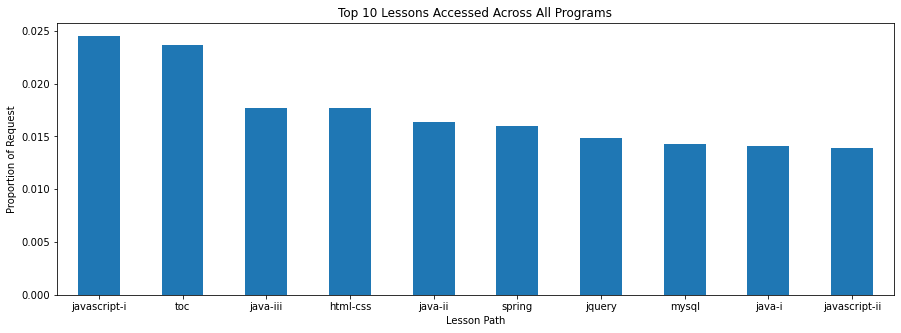

In [46]:
df1['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed Across All Programs')
plt.xticks(rotation=0)
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Request')


### Top 10 Lessons Accessed Across All Programs = javascipt-i

In [47]:
df1['path'].value_counts(normalize=False).head(10)

javascript-i     18203
toc              17591
java-iii         13166
html-css         13127
java-ii          12177
spring           11883
jquery           11041
mysql            10611
java-i           10467
javascript-ii    10294
Name: path, dtype: int64

In [48]:
# now lets get it per program
df1.program.unique()

array(['Web Dev - PHP Full Stack', 'Web Dev - Java Full Stack',
       'Web Dev - Front End', 'Data Science'], dtype=object)

In [49]:
php_df = df1[df1.program == 'Web Dev - PHP Full Stack']
java_df = df1[df1.program == 'Web Dev - Java Full Stack']
fe_df = df1[df1.program == 'Web Dev - Front End']
ds_df = df1[df1.program == 'Data Science']

### PHP

Text(0, 0.5, 'Proportion of Request')

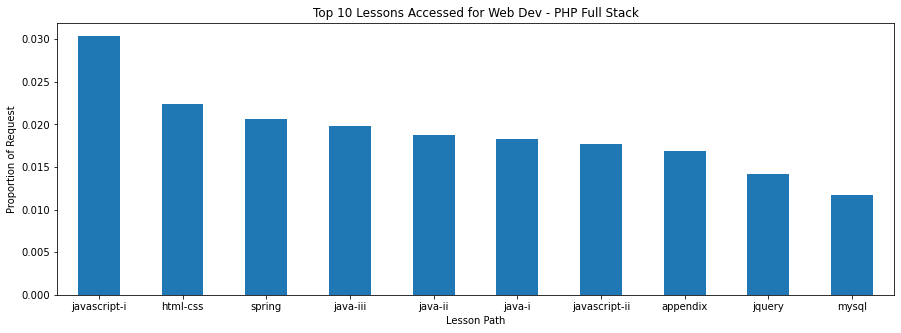

In [50]:
php_df['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed for Web Dev - PHP Full Stack')
plt.xticks(rotation=0)
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Request')

### Top 10 Lessons Accessed for Web Dev - PHP Full Stack = javascript-i

In [51]:
php_df['path'].value_counts(normalize=False).head(10)

javascript-i     736
html-css         542
spring           501
java-iii         479
java-ii          454
java-i           444
javascript-ii    429
appendix         409
jquery           344
mysql            284
Name: path, dtype: int64

### Java

Text(0, 0.5, 'Proportion of Request')

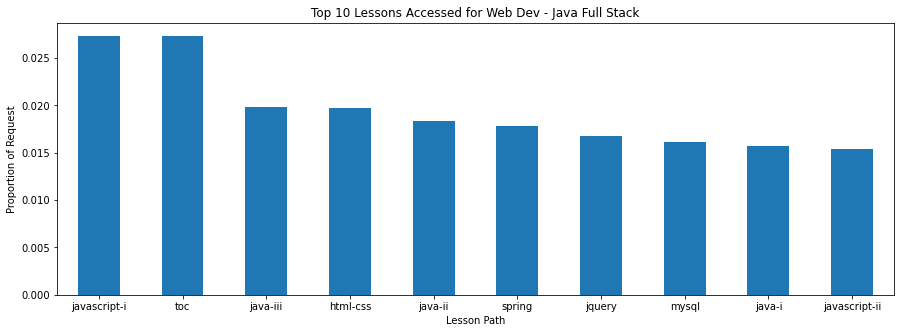

In [52]:
java_df['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed for Web Dev - Java Full Stack')
plt.xticks(rotation=0)
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Request')

### Top 10 Lessons Accessed for Web Dev - Java Full Stack = javascript-i

In [53]:
java_df['path'].value_counts(normalize=False).head(10)

javascript-i     17457
toc              17428
java-iii         12683
html-css         12569
java-ii          11719
spring           11376
jquery           10693
mysql            10318
java-i           10016
javascript-ii     9861
Name: path, dtype: int64

### Front End

Text(0, 0.5, 'Proportion of Request')

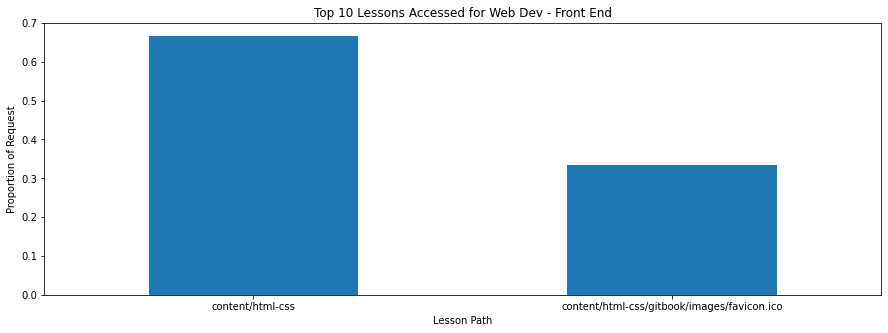

In [54]:
fe_df['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed for Web Dev - Front End')
plt.xticks(rotation=0)
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Request')

### Top 10 Lessons Accessed for Web Dev - Front End = content/html-css

In [55]:
fe_df['path'].value_counts(normalize=True).head(10)

content/html-css                               0.666667
content/html-css/gitbook/images/favicon.ico    0.333333
Name: path, dtype: float64

### Data Science

Text(0, 0.5, 'Proportion of Request')

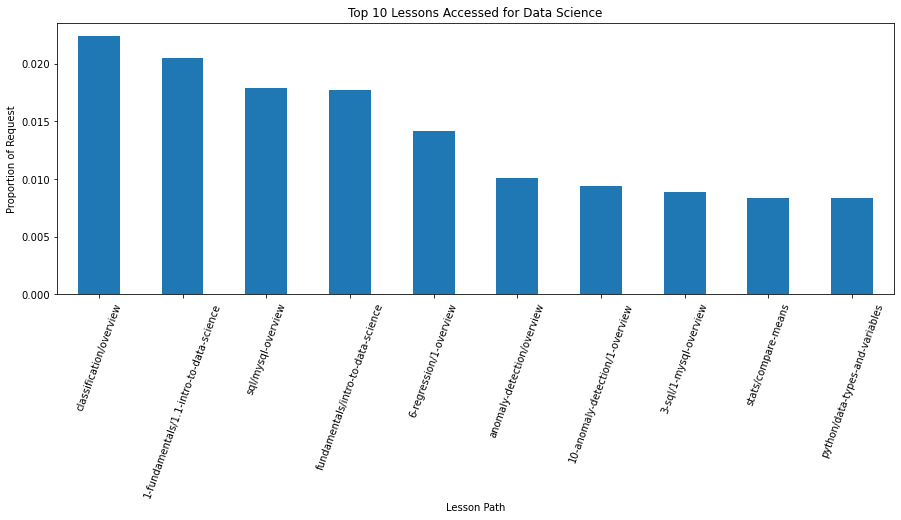

In [56]:
ds_df['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed for Data Science')
plt.xticks(rotation=70)
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Request')

### Top 10 Lessons Accessed for Data Science = classification/overview

In [57]:
ds_df['path'].value_counts(normalize=False).head(10)

classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
anomaly-detection/overview                   804
10-anomaly-detection/1-overview              751
3-sql/1-mysql-overview                       707
stats/compare-means                          668
python/data-types-and-variables              667
Name: path, dtype: int64

### Top 10 Lessons Accessed Across All Programs = javascript-i
### Top 10 Lessons Accessed for Web Dev - PHP Full Stack = javascript-i
### Top 10 Lessons Accessed for Web Dev - Java Full Stack = javascript-i
### Top 10 Lessons Accessed for Web Dev - Front End = content/html-css
### Top 10 Lessons Accessed for Data Science = classification/overview
***************************

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [82]:
df1.groupby('name').path.value_counts()

name       path                 
Andromeda  toc                      638
           javascript-i             516
           spring                   487
           java-iii                 433
           java-ii                  398
                                   ... 
Zion       student/850                1
           web-design/intro           1
           web-design/ui/visuals      1
           web-design/ux/layout       1
           web-design/ux/purpose      1
Name: path, Length: 11693, dtype: int64

In [76]:
path_given_cohort_id = (
    df.groupby('cohort_id')
    .path.value_counts(normalize=True)
    .rename('proba_path_given_cohort_id')
    .reset_index()
)
path_given_cohort_id.head(20)

,cohort_id,path,proba_path_given_cohort_id
0,1.0,/,0.070416
1,1.0,javascript-i,0.033071
2,1.0,html-css,0.024184
3,1.0,javascript-ii,0.022947
4,1.0,spring,0.021597
5,1.0,java-ii,0.018785
6,1.0,java-iii,0.017210
7,1.0,appendix,0.014961
8,1.0,jquery,0.014961
9,1.0,java-i,0.014848


### 2. Answer = Andromada Cohort viewing javascript-i

****************************

## 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [69]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [77]:
rp_df = value_counts_and_frequencies(df.name)
rp_df.head()

,count,proba
Staff,84031,0.099172
Ceres,40730,0.048069
Zion,38096,0.044960
Jupiter,37109,0.043795
Fortuna,36902,0.043551


<AxesSubplot:>

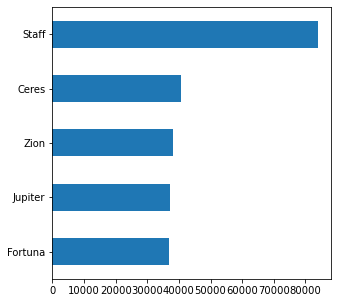

In [78]:
rp_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 5))

## 7. Which lessons are least accessed?

Text(0, 0.5, 'Proportion of Request')

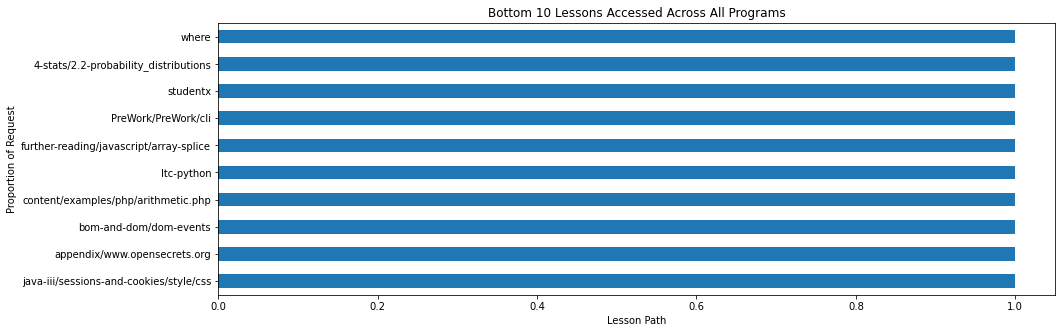

In [91]:
df1['path'].value_counts().tail(10).plot.barh(figsize=(15,5))
plt.title('Bottom 10 Lessons Accessed Across All Programs')
#plt.xticks(rotation=70)
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Request')

### Bottom 10 Lessons Accessed Across All Programs - But not all are Codeup programs

In [93]:
df1['path'].value_counts().tail(10)

java-iii/sessions-and-cookies/style/css    1
appendix/www.opensecrets.org               1
bom-and-dom/dom-events                     1
content/examples/php/arithmetic.php        1
ltc-python                                 1
further-reading/javascript/array-splice    1
PreWork/PreWork/cli                        1
studentx                                   1
4-stats/2.2-probability_distributions      1
where                                      1
Name: path, dtype: int64

In [68]:
cohort_given_path = (
    df.groupby('path')
    .cohort_id.value_counts(normalize=True)
    .rename('proba_status_given_path')
    .reset_index()
)
cohort_given_path.value_counts()

path                                     cohort_id  proba_status_given_path
%20https://github.com/RaulCPena          55.0       1.000000                   1
javascript-i/bom-and-dom                 11.0       0.000475                   1
javascript-i/arrays/manipulating         25.0       0.042043                   1
                                         26.0       0.041275                   1
                                         27.0       0.032252                   1
                                                                              ..
content/html-css/css-i/positioning.html  19.0       0.086957                   1
                                         22.0       0.086957                   1
                                         23.0       0.043478                   1
                                         27.0       0.043478                   1
wp-login                                 22.0       1.000000                   1
Length: 13565, dtype: int64

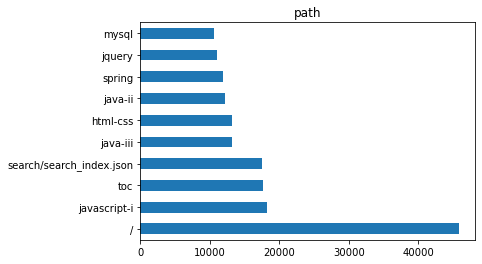

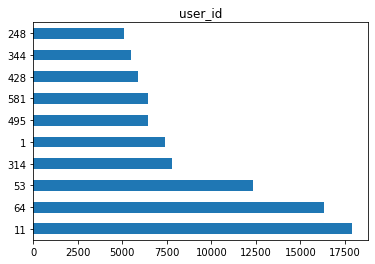

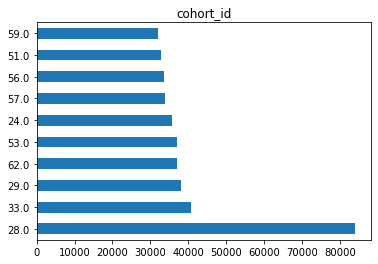

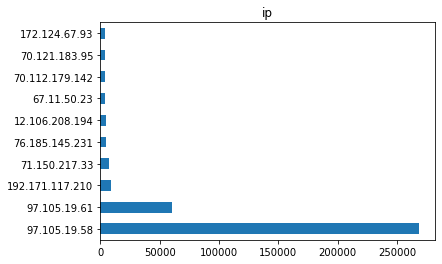

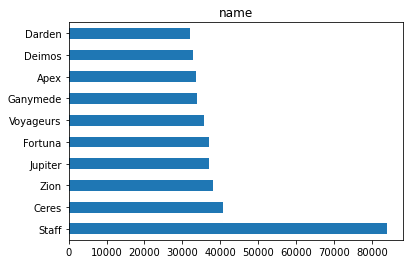

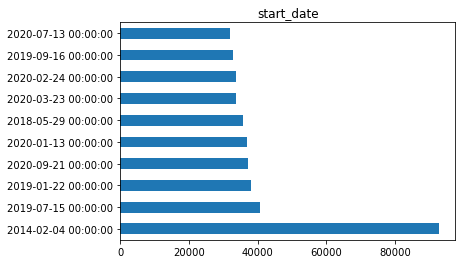

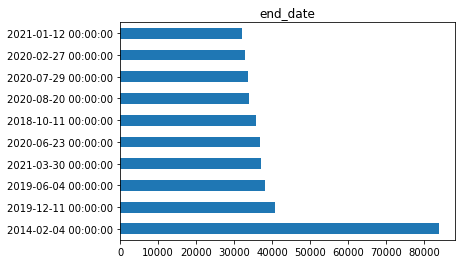

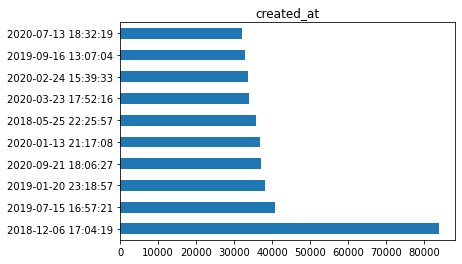

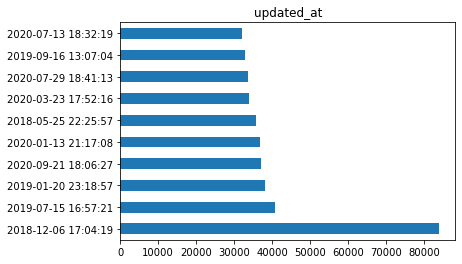

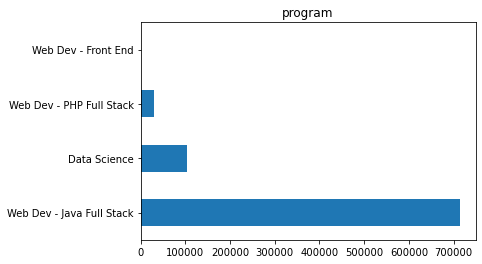

In [72]:
for col in df.columns:
    plt.figure()
    df[col].value_counts().sort_values(ascending = False).head(10).plot.barh(title = col)

In [ ]:
#cohort_given_path[cohort_given_path.proba_status_given_path < 1]

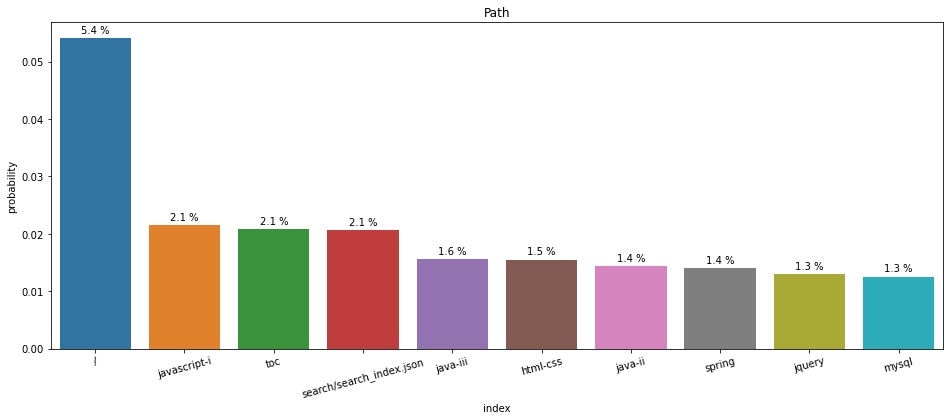

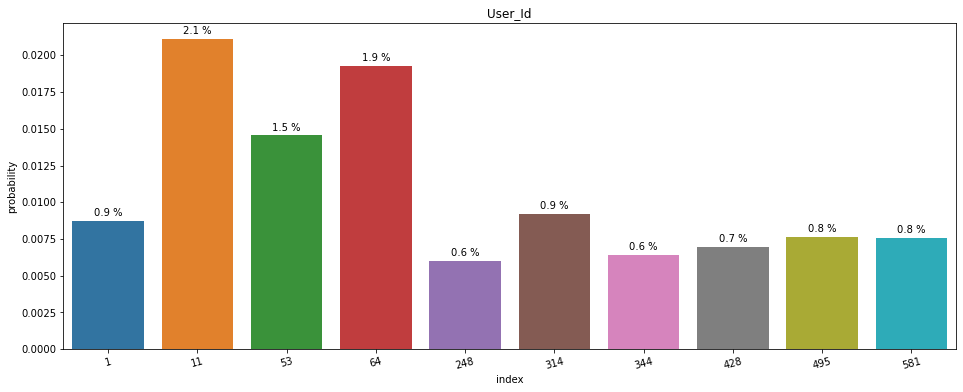

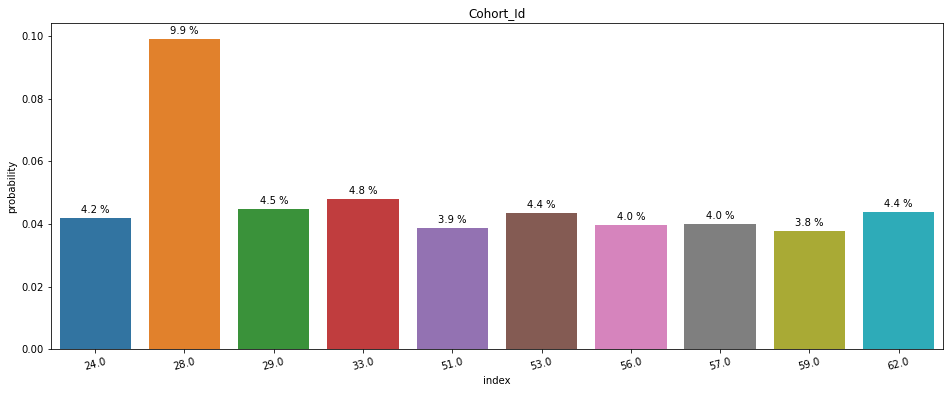

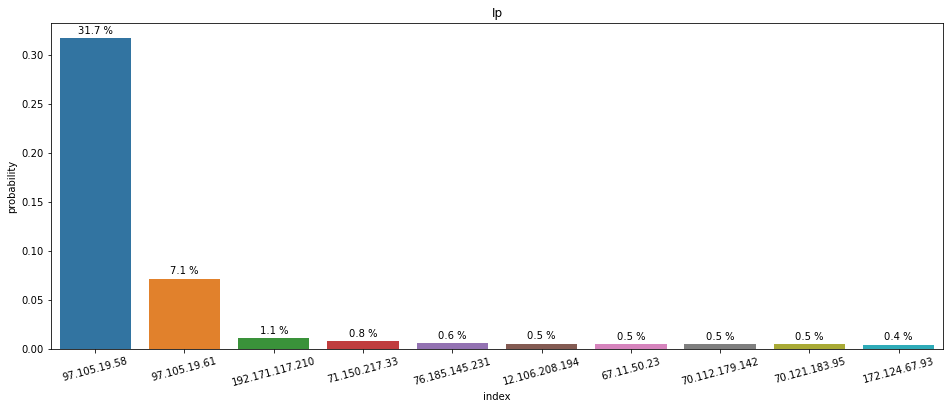

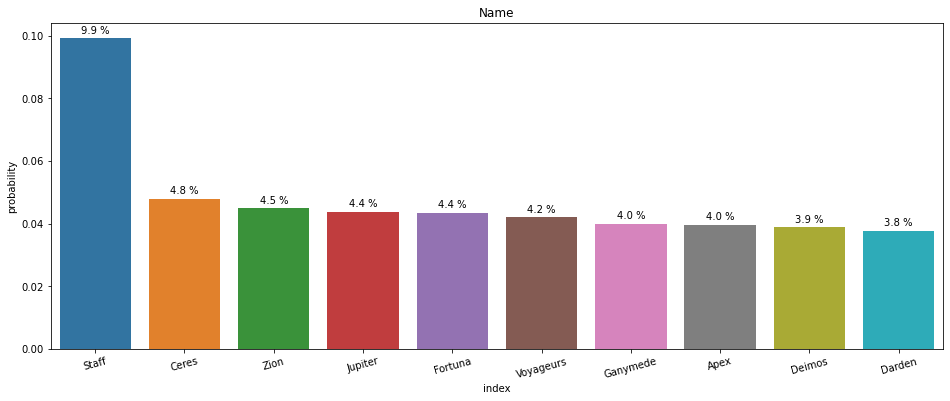

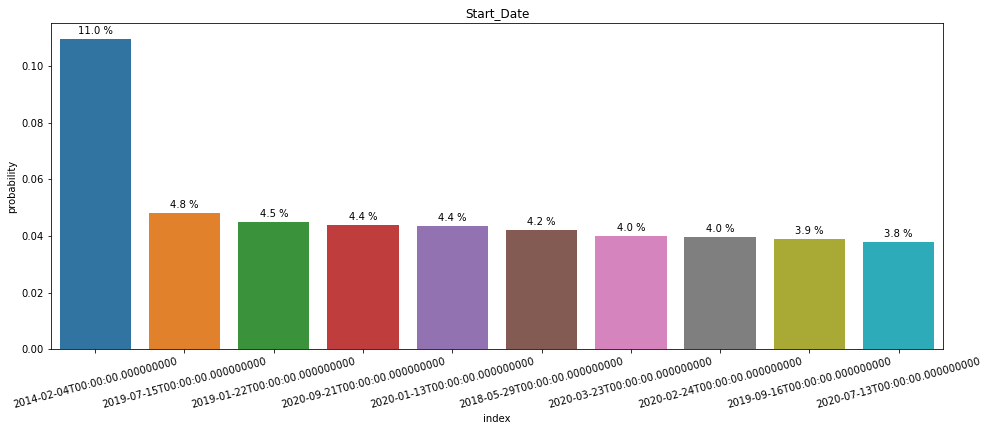

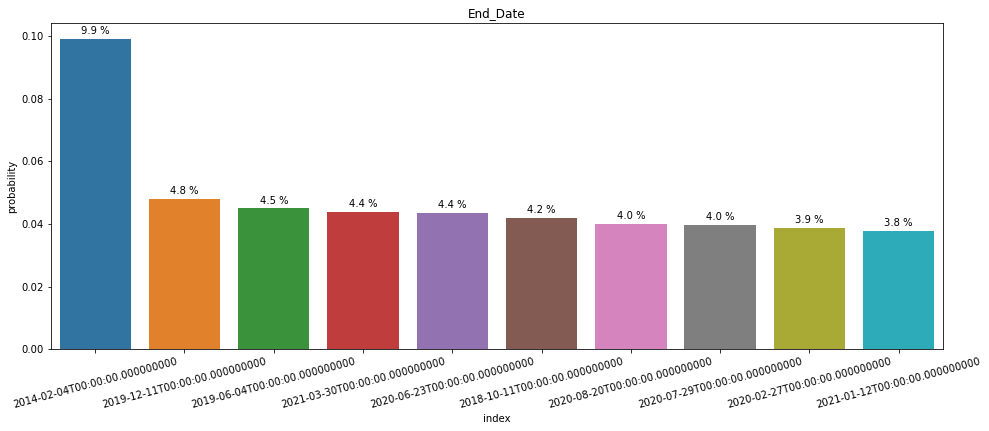

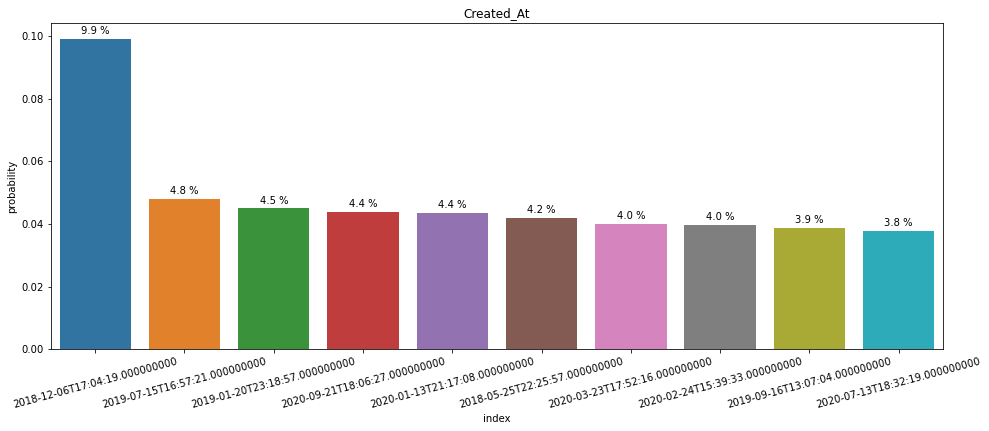

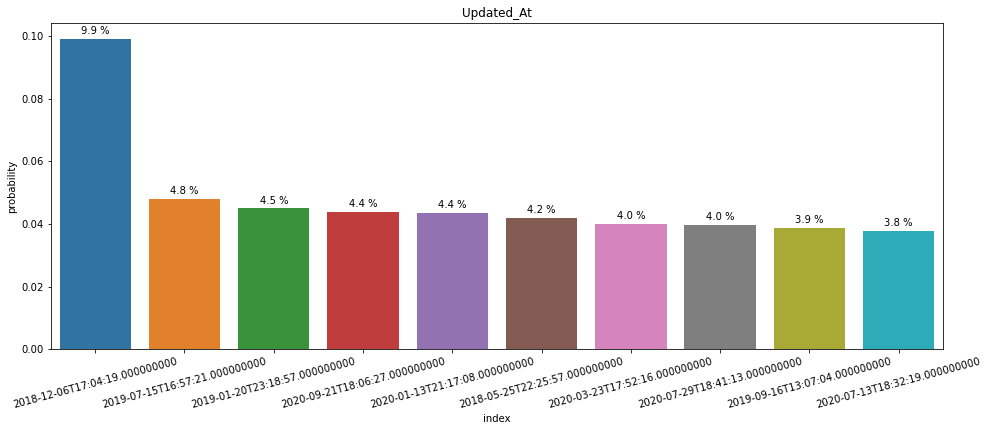

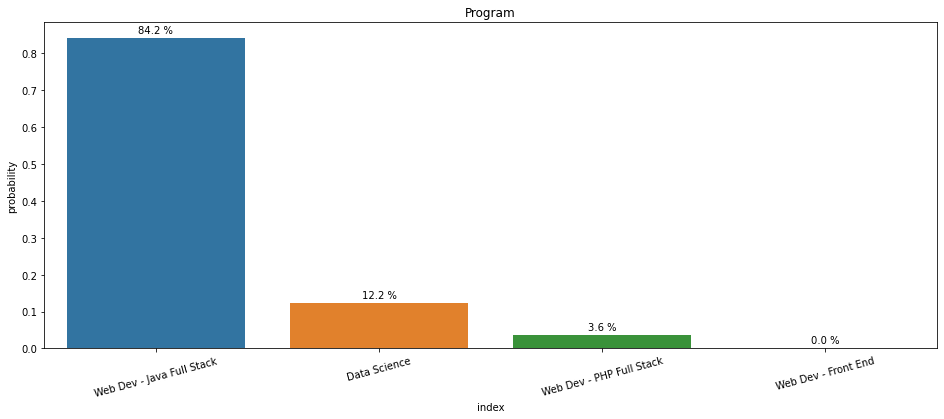

In [73]:
for col in df.columns:
    plt.figure(figsize=(16, 6))
    splot = sns.barplot(x='index', y=col, data=df[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.xticks(rotation=15)
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

In [ ]:
cohort_given_path = (
    df.groupby('path')
    .cohort_id.value_counts(normalize=True)
    .rename('proba_status_given_path')
    .reset_index()
)
cohort_given_path.head

In [ ]:
#df2 = df[["cohort_id", "name"]]


In [ ]:
#df2.value_counts()

In [ ]:
#pd.read_sql('SELECT * FROM cohorts', url)

In [ ]:
#df = df[df.cohort_id.isin([59, 133, 137])]

In [ ]:
#cohort_requests = df.groupby('cohort_id').resample('W').size().unstack(0)
cohort_requests.head()

In [ ]:
#cohort_requests.plot()